# Dyna-Q algorithm

初始化环境

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import random
import time


class CliffWalkingEnv:
    def __init__(self, ncol, nrow):
        self.nrow = nrow
        self.ncol = ncol
        self.x = 0  # 记录当前智能体位置的横坐标
        self.y = self.nrow - 1  # 记录当前智能体位置的纵坐标

    def step(self, action):  # 外部调用这个函数来改变当前位置
        # 4种动作, change[0]:上, change[1]:下, change[2]:左, change[3]:右。坐标系原点(0,0)
        # 定义在左上角
        change = [[0, -1], [0, 1], [-1, 0], [1, 0]]
        self.x = min(self.ncol - 1, max(0, self.x + change[action][0]))
        self.y = min(self.nrow - 1, max(0, self.y + change[action][1]))
        next_state = self.y * self.ncol + self.x
        reward = -1
        done = False
        if self.y == self.nrow - 1 and self.x > 0:  # 下一个位置在悬崖或者目标
            done = True
            if self.x != self.ncol - 1:
                reward = -100
        return next_state, reward, done

    def reset(self):  # 回归初始状态,起点在左上角
        self.x = 0
        self.y = self.nrow - 1
        return self.y * self.ncol + self.x
    
    

实现 Dyna—Q 算法

In [5]:
class DynaQ:
    def __init__(self,
                 ncol,
                 nrow,
                 epsilon,
                 alpha,
                 gamma,
                 n_planning,
                 n_action=4):
        self.Q_table = np.zeros([ncol * nrow, n_action])
        self.n_action = n_action
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.n_planning = n_planning
        self.model = dict()
        
    def take_action(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.randint(self.n_action)
        else:   
            action = np.argmax(self.Q_table[state])
        return action
    
    def q_learning(self, s0, a0, r, s1):
        td_error = r + self.gamma * np.max(self.Q_table[s1]) - self.Q_table[s0, a0]
        self.Q_table[s0, a0] += self.alpha * td_error
        
    def update(self, s0, a0, r, s1):
        self.q_learning(s0, a0, r, s1)
        self.model[(s0, a0)] = r, s1
        for _ in range(self.n_planning):
            (s,a),(r,s_) = random.choice(list(self.model.items()))
            self.q_learning(s,a,r,s_)
        
        
        

In [10]:
def DynaQ_CliffWalking(n_planning):
    ncol = 12
    nrow = 4
    env = CliffWalkingEnv(ncol=ncol, nrow=nrow)
    epsilon = 0.01
    alpha = .1
    gamma = .9
    agent = DynaQ(ncol,nrow,epsilon,alpha,gamma,n_planning)
    num_episodes = 300
    
    return_list = []

    for i in range(10):
        with tqdm(total=num_episodes/10, desc=f"Iteration: {i}") as pbar:
            for i_episode in range(int(num_episodes / 10)):
                episode_return = 0
                state = env.reset()
                done = False
                while not done:
                    action = agent.take_action(state)
                    next_state, reward, done = env.step(action)
                    episode_return += reward
                    agent.update(state, action, reward, next_state)
                    state = next_state
                return_list.append(episode_return)
                if (i_episode+1) % 10 == 0:
                    pbar.set_postfix({
                        'episode':f"{(num_episodes / 10 * i + i_episode + 1)}",
                        'return':f"{np.mean(return_list[-10:])}"
                    })
                pbar.update(1)
    return return_list
    
    
    


Q-planning步数为：0


Iteration: 0: 100%|██████████| 30/30.0 [00:00<00:00, 1034.44it/s, episode=30.0, return=-138.4]
Iteration: 0: 100%|██████████| 30/30.0 [00:00<00:00, 1034.44it/s, episode=30.0, return=-138.4]
Iteration: 1: 100%|██████████| 30/30.0 [00:00<00:00, 2810.63it/s, episode=60.0, return=-64.1]
Iteration: 1: 100%|██████████| 30/30.0 [00:00<00:00, 2810.63it/s, episode=60.0, return=-64.1]
Iteration: 2: 100%|██████████| 30/30.0 [00:00<00:00, 4221.18it/s, episode=90.0, return=-46.0]
Iteration: 3: 100%|██████████| 30/30.0 [00:00<00:00, 5724.19it/s, episode=120.0, return=-38.0]
Iteration: 2: 100%|██████████| 30/30.0 [00:00<00:00, 4221.18it/s, episode=90.0, return=-46.0]
Iteration: 3: 100%|██████████| 30/30.0 [00:00<00:00, 5724.19it/s, episode=120.0, return=-38.0]
Iteration: 4: 100%|██████████| 30/30.0 [00:00<00:00, 6483.36it/s, episode=150.0, return=-28.6]
Iteration: 5: 100%|██████████| 30/30.0 [00:00<00:00, 8483.62it/s, episode=180.0, return=-25.3]
Iteration: 6: 100%|██████████| 30/30.0 [00:00<00:00, 1

Q-planning步数为：2


Iteration: 0: 100%|██████████| 30/30.0 [00:00<00:00, 955.50it/s, episode=30.0, return=-53.8] 
Iteration: 0: 100%|██████████| 30/30.0 [00:00<00:00, 955.50it/s, episode=30.0, return=-53.8] 
Iteration: 1: 100%|██████████| 30/30.0 [00:00<00:00, 2172.13it/s, episode=60.0, return=-37.1]
Iteration: 1: 100%|██████████| 30/30.0 [00:00<00:00, 2172.13it/s, episode=60.0, return=-37.1]
Iteration: 2: 100%|██████████| 30/30.0 [00:00<00:00, 3138.67it/s, episode=90.0, return=-23.6]
Iteration: 2: 100%|██████████| 30/30.0 [00:00<00:00, 3138.67it/s, episode=90.0, return=-23.6]
Iteration: 3: 100%|██████████| 30/30.0 [00:00<00:00, 4608.96it/s, episode=120.0, return=-18.5]
Iteration: 4: 100%|██████████| 30/30.0 [00:00<00:00, 4819.19it/s, episode=150.0, return=-16.4]
Iteration: 3: 100%|██████████| 30/30.0 [00:00<00:00, 4608.96it/s, episode=120.0, return=-18.5]
Iteration: 4: 100%|██████████| 30/30.0 [00:00<00:00, 4819.19it/s, episode=150.0, return=-16.4]
Iteration: 5: 100%|██████████| 30/30.0 [00:00<00:00, 588

Q-planning步数为：20


Iteration: 0: 100%|██████████| 30/30.0 [00:00<00:00, 451.35it/s, episode=30.0, return=-18.5]
Iteration: 0: 100%|██████████| 30/30.0 [00:00<00:00, 451.35it/s, episode=30.0, return=-18.5]
Iteration: 1: 100%|██████████| 30/30.0 [00:00<00:00, 1107.06it/s, episode=60.0, return=-13.6]
Iteration: 1: 100%|██████████| 30/30.0 [00:00<00:00, 1107.06it/s, episode=60.0, return=-13.6]
Iteration: 2: 100%|██████████| 30/30.0 [00:00<00:00, 1244.67it/s, episode=90.0, return=-13.0]
Iteration: 2: 100%|██████████| 30/30.0 [00:00<00:00, 1244.67it/s, episode=90.0, return=-13.0]
Iteration: 3: 100%|██████████| 30/30.0 [00:00<00:00, 1204.38it/s, episode=120.0, return=-13.5]
Iteration: 3: 100%|██████████| 30/30.0 [00:00<00:00, 1204.38it/s, episode=120.0, return=-13.5]
Iteration: 4: 100%|██████████| 30/30.0 [00:00<00:00, 1159.12it/s, episode=150.0, return=-13.5]
Iteration: 4: 100%|██████████| 30/30.0 [00:00<00:00, 1159.12it/s, episode=150.0, return=-13.5]
Iteration: 5: 100%|██████████| 30/30.0 [00:00<00:00, 1229.

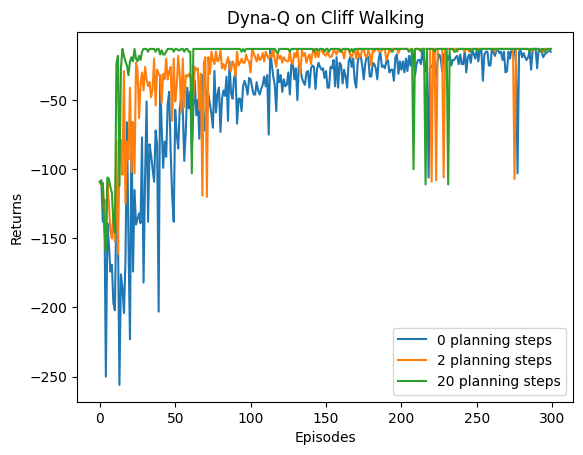

In [11]:
np.random.seed(0)
random.seed(0)
n_planning_list = [0, 2, 20]
for n_planning in n_planning_list:
    print('Q-planning步数为：%d' % n_planning)
    time.sleep(0.5)
    return_list = DynaQ_CliffWalking(n_planning)
    episodes_list = list(range(len(return_list)))
    plt.plot(episodes_list,
             return_list,
             label=str(n_planning) + ' planning steps')
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Dyna-Q on {}'.format('Cliff Walking'))
plt.show()